# Idea

Ok, so here we are trying to prototype the workflow for create_summary_spreadsheets.py.

Let's kind of do a dry run with wserv8.

We will want both the cleaned and uncleaned summary spreadsheet, to do some light diagnostics on (and to compare counts, and how much was removed, etc), you know.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

from wuvars.analysis.variability_selection import spreadsheet_maker


In [2]:
raw_data_path = (
    "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
)
cleaned_data_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv8/"

wserv8_uncleaned_data = os.path.join(raw_data_path, "wserv8.fits.gz")
wserv8_cleaned_data = os.path.join(cleaned_data_path, "WSERV8_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

In [3]:
# can pandas load both directly? -> Nope! Gotta go through astropy.table.

# what do we usually do to create a pandas dataframe?

w8_dat = Table.read(wserv8_uncleaned_data, format='fits')
w8_df = w8_dat.to_pandas()

w8_dat_clean = Table.read(wserv8_cleaned_data, format='hdf5')
w8_df_clean = w8_dat_clean.to_pandas()

In [4]:
from datetime import datetime
startTime = datetime.now()

w8_ds = spreadsheet_maker(w8_df)

print(datetime.now() - startTime)

/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:223: RuntimeWarning: Mean of empty slice
  d.append(fn(x[column]))
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:223: RuntimeWarning: All-NaN axis encountered
  d.append(fn(x[column]))
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/variability_selection.py:184: RuntimeWarning: All-NaN axis encountered
  lambda x: np.nanmax(x) - np.nanmin(x),
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=

0:20:12.761185


In [5]:
from datetime import datetime
startTime = datetime.now()

w8_ds_clean = spreadsheet_maker(w8_df_clean)

print(datetime.now() - startTime)
os.system("python print('\a')")

0:22:38.791658


512

In [6]:
os.system("python print('\a')")

512

In [14]:
w8_ds

mean                                          \
                  MEANMJDOBS        RA       DEC    JMHPNT JMHPNTERR   
SOURCEID                                                               
44989782425636  56996.757397  0.980061  0.557602  1.166593  0.177377   
44989782425657  56995.009049  0.980041  0.556831  0.868558  0.040707   
44989782425659  57002.207504  0.980032  0.556904  1.023378  0.270562   
44989782425662  56975.287272  0.980042  0.555072       NaN       NaN   
44989782425663  56997.313274  0.980042  0.555073  1.138789  0.228608   
...                      ...       ...       ...       ...       ...   
44989782510378  56979.890633  0.975586  0.568335  0.791509  0.128899   
44989782510467  56973.802980  0.973678  0.568999       NaN       NaN   
44989782510480  57002.047216  0.973165  0.569096       NaN       NaN   
44989782510495  56992.114741  0.974004  0.569089  0.607572  0.015512   
44989782510579  56959.488498  0.973811  0.569788       NaN       NaN   

                                                                       ...  \
                  HMKPNT HMKPNTERR  JAPERMAG3 JAPERMAG3ERR  HAPERMAG3  ...   
SOURCEID                                                               ...   
44989782425636  0.582503  0.135496  19.189306     0.153868  18.024357  ...   
44989782425657  0.425294  0.034894  17.215374     0.035166  16.344858  ...   
44989782425659  0.498455  0.263469  19.794195     0.224525  18.818468  ...   
44989782425662  1.285171  0.197845        NaN          NaN  18.461399  ...   
44989782425663  1.149653  0.168479  19.677401     0.194110  18.550827  ...   
...                  ...       ...        ...          ...        ...  ...   
44989782510378  0.523089  0.129042  18.442432     0.105594  17.715822  ...   
44989782510467  0.843327  0.238310        NaN          NaN  18.910107  ...   
44989782510480  0.832560  0.212263  19.371468     0.163139  18.603592  ...   
44989782510495  0.318886  0.016430  16.027012     0.013001  15.393021  ...   
44989782510579  0.741639  0.253255        NaN          NaN  18.973705  ...   

                    count                       variability              \
               N_J_severe N_H_severe N_K_severe J_red_chisq H_red_chisq   
SOURCEID                                                                  
44989782425636        1.0        0.0        3.0    0.959835    1.345637   
44989782425657        2.0        3.0        3.0    1.123141    1.209406   
44989782425659        0.0        2.0        3.0    1.268688    1.012558   
44989782425662        0.0        0.0        0.0   -0.000000    1.401251   
44989782425663        0.0        2.0        8.0    1.508253    1.192851   
...                   ...        ...        ...         ...         ...   
44989782510378        1.0        1.0        2.0    1.055858    3.567749   
44989782510467        0.0        0.0        0.0   -0.000000    1.028634   
44989782510480        0.0        0.0        0.0         NaN    1.035871   
44989782510495        0.0        0.0        0.0   74.661873  115.371838   
44989782510579        0.0        4.0       13.0   -0.000000    0.242180   

                                                                           
                 K_red_chisq Stetson_HK Stetson_JK Stetson_JH Stetson_JHK  
SOURCEID                                                                   
44989782425636      1.632889   0.030940  -0.007808   0.022693    0.055095  
44989782425657      1.268259  -0.035051   0.033339   0.094998    0.096449  
44989782425659      0.968563   0.007375   0.113396  -0.292019   -0.177152  
44989782425662      6.510359   1.126124        NaN        NaN         NaN  
44989782425663      1.498637   0.013240   0.019324   0.126955    0.394049  
...                      ...        ...        ...        ...         ...  
44989782510378  12261.936523  -0.086469  -0.027184   0.037860   -0.105737  
44989782510467      0.594763  -0.653419        NaN        NaN         NaN  
44989782510480      1.140552   0.85

In [15]:
for item in w8_ds_clean.columns:
    print(item)

('mean', 'MEANMJDOBS')
('mean', 'RA')
('mean', 'DEC')
('mean', 'JMHPNT')
('mean', 'JMHPNTERR')
('mean', 'HMKPNT')
('mean', 'HMKPNTERR')
('mean', 'JAPERMAG3')
('mean', 'JAPERMAG3ERR')
('mean', 'HAPERMAG3')
('mean', 'HAPERMAG3ERR')
('mean', 'KAPERMAG3')
('mean', 'KAPERMAG3ERR')
('mean', 'JPPERRBITS')
('mean', 'HPPERRBITS')
('mean', 'KPPERRBITS')
('mean', 'MERGEDCLASS')
('mean', 'PSTAR')
('mean', 'JGRADE')
('mean', 'HGRADE')
('mean', 'KGRADE')
('median', 'MEANMJDOBS')
('median', 'RA')
('median', 'DEC')
('median', 'JMHPNT')
('median', 'JMHPNTERR')
('median', 'HMKPNT')
('median', 'HMKPNTERR')
('median', 'JAPERMAG3')
('median', 'JAPERMAG3ERR')
('median', 'HAPERMAG3')
('median', 'HAPERMAG3ERR')
('median', 'KAPERMAG3')
('median', 'KAPERMAG3ERR')
('median', 'JPPERRBITS')
('median', 'HPPERRBITS')
('median', 'KPPERRBITS')
('median', 'MERGEDCLASS')
('median', 'PSTAR')
('median', 'JGRADE')
('median', 'HGRADE')
('median', 'KGRADE')
('min', 'MEANMJDOBS')
('min', 'RA')
('min', 'DEC')
('min', 'JMHPNT')

In [18]:
ds = w8_ds_clean

q2_all_indices = (
    (ds["count"]["N_J"] > 50)
    & (ds["count"]["N_J"] < 150)
    & (ds["count"]["N_H"] > 50)
    & (ds["count"]["N_H"] < 150)
    & (ds["count"]["N_K"] > 50)
    & (ds["count"]["N_K"] < 150)
    & (ds["max"]["JPPERRBITS"] == 0)
    & (ds["max"]["HPPERRBITS"] == 0)
    & (ds["max"]["KPPERRBITS"] == 0)
    & (ds["median"]["PSTAR"] > 0.75)
)

In [19]:
np.sum(q2_all_indices)

7245

Text(0, 0.5, 'standard deviation')

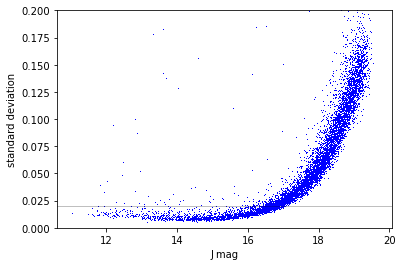

In [27]:
plt.plot(ds['median']['JAPERMAG3'][q2_all_indices], ds['std']['JAPERMAG3'][q2_all_indices], 'b,')
plt.axhline(0, color='k', alpha=0.5, lw=0.5)
plt.axhline(0.02, color='k', alpha=0.5, lw=0.5)
plt.ylim(0, 0.2)

plt.xlabel("J mag")
plt.ylabel("standard deviation")

In [12]:
ds['max']['JAPERMAG3'].min()

9.399102210998535

In [13]:
# Can these 
# w8_df_clean[w8_df_clean == -999999488.0] = np.nan
w8_df_clean

,SOURCEID,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
0,44989782425636,56849.626177,0.980061,0.557602,NaN,1.040192e+09,0.832344,1.884656e-01,NaN,1.040192e+09,...,NaN,1.425356e-01,0,32768,32768,1,0.003067,0.903529,0.919580,0.842437
1,44989782425636,56849.629000,0.980061,0.557602,NaN,1.040192e+09,1.121714,2.129889e-01,NaN,1.040192e+09,...,NaN,1.066585e-01,0,0,0,1,0.003067,0.973585,0.762755,0.840764
2,44989782425636,56850.617897,0.980062,0.557604,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.791137e-01,...,NaN,1.040192e+09,0,0,0,-1,0.900000,0.887588,0.945899,0.989293
3,44989782425636,56850.619583,0.980060,0.557602,NaN,1.040192e+09,0.812544,1.735760e-01,NaN,1.040192e+09,...,17.325947,1.229342e-01,0,0,0,-2,0.486486,0.966667,0.982103,0.968586
4,44989782425636,56853.625150,0.980061,0.557602,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,NaN,1.229759e-01,0,0,0,1,0.050000,0.000000,0.000000,0.896907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647984,44989782510579,57006.276060,0.973811,0.569786,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,18.122734,1.953976e-01,0,0,0,1,0.050000,0.990798,0.987603,0.994778
1647985,44989782510579,57037.250493,0.973811,0.569788,NaN,1.040192e+09,0.918955,2.787633e-01,NaN,1.040192e+09,...,18.110760,1.866906e-01,0,524288,524288,1,0.003067,1.000000,0.993814,1.000000
1647986,44989782510579,57043.280120,0.973811,0.569788,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,17.989620,1.637523e-01,0,0,524288,1,0.050000,0.984710,0.987755,0.994778
1647987,44989782510579,57049.213857,0.973811,0.569786,NaN,1.040192e+09,NaN,1.040192e+09,NaN,1.040192e+09,...,NaN,1.040192e+09,0,0,0,1,0.050000,0.987616,0.997921,0.994681
